In [1]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [3]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words = 1000, test_split = 0.2)

In [4]:
category = numpy.max(Y_train)+1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [7]:
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [8]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20,
                    validation_data=(x_test, y_test))

C:\Users\pc\Anaconda3\envs\tf2.0-gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 7s 745us/step - loss: 2.5913 - accuracy: 0.3537 - val_loss: 2.2763 - val_accuracy: 0.4711
Epoch 2/20
8982/8982 [==============================] - 6s 658us/step - loss: 2.0870 - accuracy: 0.4815 - val_loss: 2.0064 - val_accuracy: 0.5085
Epoch 3/20
8982/8982 [==============================] - 6s 661us/step - loss: 1.9520 - accuracy: 0.5078 - val_loss: 1.8861 - val_accuracy: 0.5218
Epoch 4/20
8982/8982 [==============================] - 6s 660us/step - loss: 1.7746 - accuracy: 0.5463 - val_loss: 1.7533 - val_accuracy: 0.5543
Epoch 5/20
8982/8982 [==============================] - 6s 664us/step - loss: 1.6810 - accuracy: 0.5707 - val_loss: 1.6986 - val_accuracy: 0.5659
Epoch 6/20
8982/8982 [==============================] - 6s 658us/step - loss: 1.6213 - accuracy: 0.5890 - val_loss: 1.6760 - val_accuracy: 0.5757
Epoch 7/20
8982/8982 [==============================] - 6s 663us/step - loss

In [9]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

2246/2246 [==============================] - 1s 441us/step

 Test Accuracy: 0.7213


In [10]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

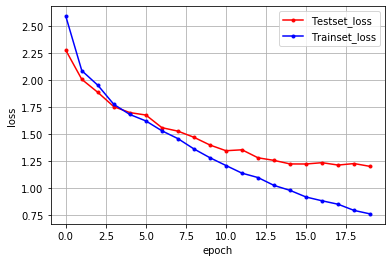

In [11]:
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.',c='blue',label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()